![alt text](logo-ceara.png "Title")

In [1]:
import re
import unicodedata
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('mapa.csv', sep=';')
df = df.fillna('')
df['startsOn'] = pd.to_datetime(df['startsOn'])

In [3]:
# Optional 'r$', matching digits afterwards
value_pattern_str = r"^(r\$)?\s?[1-9]\d{0,2}(\.\d{3})*,\d{2}$"
value_pattern = re.compile(value_pattern_str)

def format_prices(s):
    t = s.lower()
    if 'alimento' in t:
        return "ALIMENTO"
    elif 'meia' in t or 'inteira' in t or 'e r$' in t:
        return "INTEIRA E MEIA"
    elif 'fralda' in t or 'brinquedo' in t or 'pacote' in t:
        return "DOAÇÃO"
    elif 'gratuito' in t:
        return "GRATUITO"
    elif value_pattern.match(t):
        return "PAGO"
    else:
        return "OUTRO"

# Copy main DataFrame to analyse prices
price_df = df[['price']].copy()
price_df = price_df[price_df.price.apply(lambda x: bool(value_pattern.match(x)))]
price_df['price'] = price_df['price'].apply(lambda x: int(re.sub(r"\D", "", x)) / 100)
# Clean absurd values
price_df_trunc = price_df.copy()
price_df_trunc.drop(price_df_trunc[price_df_trunc['price'] == 99999.99].index, inplace=True)

df['price'] = df['price'].apply(format_prices)


In [4]:
df

,id,startsOn,until,price,spaceId,name,shortDescription,classificacaoEtaria,singleUrl,subTitle,registrationInfo,avatar,terms.tag,terms.linguagem
0,4394,2012-01-10,,GRATUITO,1671,TWINDOW,“ Twindow” é uma tentativa de comunicação text...,Livre,https://mapacultural.secult.ce.gov.br/evento/4...,,,https://mapacultural.secult.ce.gov.br/files/ev...,,Artes Integradas
1,2266,2012-01-28,2012-02-11,PAGO,1304,Reino Folia - Pré-Carnaval Álvaro Weyne 2012,"O Bloco Reino Folia, nasceu, assim como outros...",16 anos,https://mapacultural.secult.ce.gov.br/evento/2...,Bloco de Carnaval de Rua do Álvaro Weyne,O evento contou com o apoio da Prefeitura de F...,https://mapacultural.secult.ce.gov.br/files/ev...,,Cultura Tradicional
2,2266,2012-01-28,2012-02-11,PAGO,1304,Reino Folia - Pré-Carnaval Álvaro Weyne 2012,"O Bloco Reino Folia, nasceu, assim como outros...",16 anos,https://mapacultural.secult.ce.gov.br/evento/2...,Bloco de Carnaval de Rua do Álvaro Weyne,O evento contou com o apoio da Prefeitura de F...,https://mapacultural.secult.ce.gov.br/files/ev...,,Cultura Tradicional
3,2266,2012-01-28,2012-02-11,PAGO,1304,Reino Folia - Pré-Carnaval Álvaro Weyne 2012,"O Bloco Reino Folia, nasceu, assim como outros...",16 anos,https://mapacultural.secult.ce.gov.br/evento/2...,Bloco de Carnaval de Rua do Álvaro Weyne,O evento contou com o apoio da Prefeitura de F...,https://mapacultural.secult.ce.gov.br/files/ev...,,Cultura Tradicional
4,6157,2012-04-19,,GRATUITO,2979,5o. Abril pra Angola : no caminho da ancestral...,Evento tradicional realizado pelo centro cult...,Livre,https://mapacultural.secult.ce.gov.br/evento/6...,,,,,Artes Integradas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12854,7046,2021-06-24,2021-12-31,GRATUITO,5391,A DESCOBERTA ALÉM DO ALCANCE DE GEORGIA GABRIE...,EXPERIMENTA!\r\n\r\nI MOSTRA DE EXPERIMENTOS C...,Livre,https://mapacultural.secult.ce.gov.br/evento/7...,A descoberta além do alcance de Georgia Gabrie...,,https://mapacultural.secult.ce.gov.br/files/ev...,,Teatro
12855,7046,2021-06-24,2021-12-31,GRATUITO,5391,A DESCOBERTA ALÉM DO ALCANCE DE GEORGIA GABRIE...,EXPERIMENTA!\r\n\r\nI MOSTRA DE EXPERIMENTOS C...,Livre,https://mapacultural.secult.ce.gov.br/evento/7...,A descoberta além do alcance de Georgia Gabrie...,,https://mapacultural.secult.ce.gov.br/files/ev...,,Teatro
12856,7239,2021-10-13,2023-12-27,GRATUITO,1636,Cururu Skate e Rap - A batalha.,Batalha de rap que ocorre todas as quartas fei...,Livre,https://mapacultural.secult.ce.gov.br/evento/7...,Batalha de mc's e evento cultural.,GRATUITA.,https://mapacultural.secult.ce.gov.br/files/ev...,,Hip Hop
12857,7046,2021-06-24,2021-12-31,GRATUITO,5391,A DESCOBERTA ALÉM DO ALCANCE DE GEORGIA GABRIE...,EXPERIMENTA!\r\n\r\nI MOSTRA DE EXPERIMENTOS C...,Livre,https://mapacultural.secult.ce.gov.br/evento/7...,A descoberta além do alcance de Georgia Gabrie...,,https://mapacultural.secult.ce.gov.br/files/ev...,,Teatro


In [5]:
price_df.size, price_df_trunc.size

(849, 605)

In [6]:
print("Eventos pagos:")
print("Média de valor:", price_df['price'].mean())
print("Mediana de valor:", price_df['price'].median())
print("Desvio absoluto médio:", price_df['price'].mad())
print("Variância de valor:", price_df['price'].var())
print("Desvio padrão de valor:", price_df['price'].std())
print("Intervalo de valores: [%d, %d]" % (price_df['price'].min(), price_df['price'].max()))
print("")
print("Eventos pagos (Outliers removidos):")
print("Média de valor:", price_df_trunc['price'].mean())
print("Mediana de valor:", price_df_trunc['price'].median())
print("Desvio absoluto médio:", price_df_trunc['price'].mad())
print("Variância de valor:", price_df_trunc['price'].var())
print("Desvio padrão de valor:", price_df_trunc['price'].std())
print("Intervalo de valores: [%d, %d]" % (price_df_trunc['price'].min(), price_df_trunc['price'].max()))

Eventos pagos:
Média de valor: 28854.223274440516
Mediana de valor: 20.0
Desvio absoluto médio: 40894.15095650533
Variância de valor: 2044017937.7467225
Desvio padrão de valor: 45210.81660119315
Intervalo de valores: [2, 99999]

Eventos pagos (Outliers removidos):
Média de valor: 160.72396694214876
Mediana de valor: 20.0
Desvio absoluto médio: 268.71635544020216
Variância de valor: 266184.08427562803
Desvio padrão de valor: 515.9303095144033
Intervalo de valores: [2, 2000]


<AxesSubplot:>

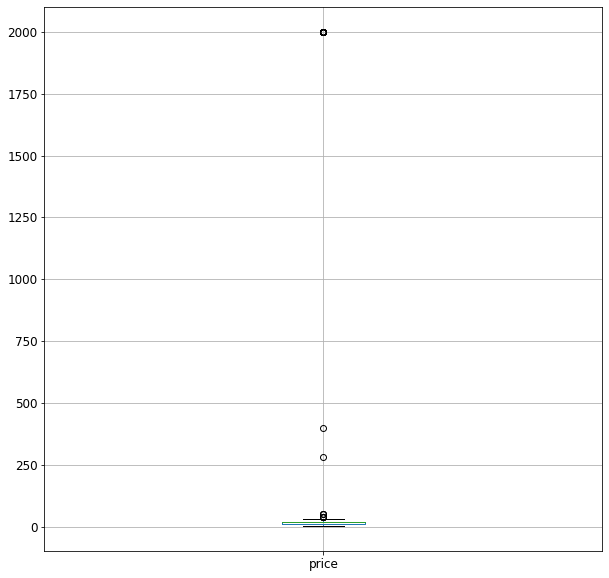

In [7]:
price_df_trunc.boxplot(column=['price'], fontsize='large', figsize=(10,10))

### Normalização

In [8]:
k1 = int(math.sqrt(price_df.size))
k1 = math.ceil(1 + 3.33 * math.log10(price_df.size))

k2 = int(math.sqrt(price_df_trunc.size))
k2 = math.ceil(1 + 3.33 * math.log10(price_df_trunc.size))

k1, k2, k1 == k2

(11, 11, True)

(array([ 89.,  42.,  51., 369.,   8.,   0.,   0.,   2.,   0.,  44.]),
 array([0.69314718, 1.38392271, 2.07469824, 2.76547376, 3.45624929,
        4.14702482, 4.83780035, 5.52857588, 6.2193514 , 6.91012693,
        7.60090246]),
 <BarContainer object of 10 artists>)

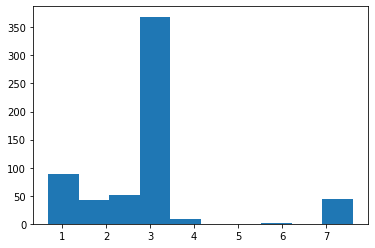

In [9]:
# Normalized
plt.hist(np.log(price_df_trunc['price']), bins=10)

### Eventos por preço

<AxesSubplot:>

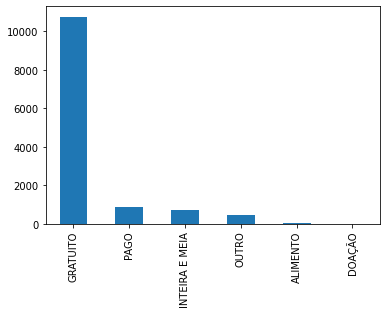

In [10]:
df['price'].value_counts().plot(kind='bar')

### Eventos por classificação etária

<AxesSubplot:>

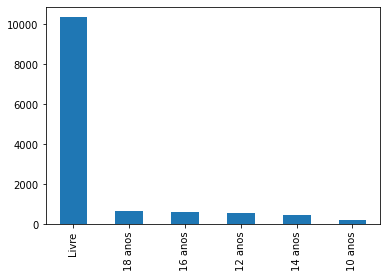

In [11]:
df['classificacaoEtaria'].value_counts().plot(kind='bar')

### Exibir linguagens

In [12]:
# Map a Counter to split terms.linguagem
lang_dict = dict(df['terms.linguagem'].str.split(',').map(Counter).sum())

# Make DataFrame from records (For visualization purposes)
lang = pd.DataFrame.from_records(list(lang_dict.items()), columns=['linguagem','count'])
# Drop empty record
lang = lang.drop(lang.index[10])
lang

,linguagem,count
0,Artes Integradas,858
1,Cultura Tradicional,1266
2,Dança,1443
3,Artes Visuais,1806
4,Música Popular,1076
5,Palestra,1140
6,Debate ou Encontro,1140
7,Livro e Literatura,1672
8,Outros,1672
9,Teatro,998


### Nuvem de palavras das linguagens

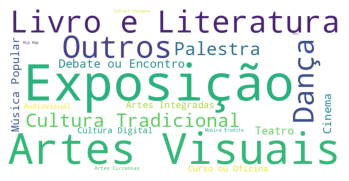

In [13]:
wc = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(lang_dict)
plt.imshow(wc)
plt.axis("off")
plt.show()

### Numem de palavras da descrição de eventos

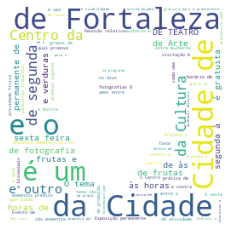

In [14]:
mapa_mask = np.array(Image.open('mapa-mask.png'))
wc2 = WordCloud(background_color='white', width=500, height=500, mask=mapa_mask).generate(' '.join(df['shortDescription']))
plt.imshow(wc2)
plt.axis("off")
plt.show()

### Eventos por ano

<AxesSubplot:xlabel='startsOn'>

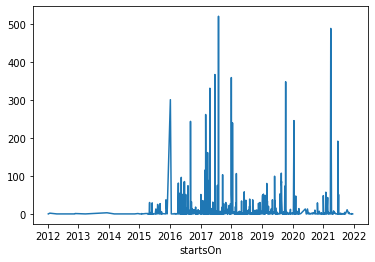

In [15]:
df.groupby(df['startsOn'].dt.date).size().plot()